In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt
from ipywidgets import interact
import sys
from os import path

# generates single particle states
def wf_gen(N,N_pt,BC,t1,t2):
    h1=np.ones(N-1)
    h1[0::2]=0
    h2=np.ones(N-1)
    h2[1::2]=0
    hop= np.diag(t1*h1+t2*h2+0j,1)
    hop[N-1,0]= t1*BC
    H_t= -(hop+ np.matrix(hop).H)/2 
    energies, evecs= np.linalg.eigh(H_t)
    return evecs[:,:N_pt]

def exact_renyi_calc(r,GA,epsilon=1e-9):
    chi0, _ =np.linalg.eigh(GA)
    chi1=chi0[np.nonzero(np.abs(chi0)>epsilon)]
    chi2=chi1[np.nonzero(np.abs(chi1-1)>epsilon)]
    return np.sum(np.log((1-chi2)**r+chi2**r))/(1-r)

In [18]:

scratch="scratch/"

ex=2
r=2 # Renyi index
# system size
N=20
Lsub_list=np.arange(1,N)
# Lsub_list=np.arange(4,10,2)
# Lsub_list=[8]
N_pt = int(N/2)

# reference slater determinant
t= -0.
# hopping amplitudes
t1= 1-t
t2= 1+t
BC=np.exp(1j*pi) # boundary condition on a chain, you can put BC=0 for open chain
# BC=1 periodic boundary condition and BC=-1 is anti-periodic
# do not put BC=1 since the gs is not unique in that case
V1=wf_gen(N,N_pt,BC,t1,t2) # eigenvectors in 

R2_ex=np.zeros(len(Lsub_list))
Gmat=np.dot(V1,np.matrix(V1).H)

R2_vmc=np.zeros(len(Lsub_list), dtype=np.complex64)
acc_ratio=np.zeros(len(Lsub_list))
counter=np.zeros(len(Lsub_list))

Nrep=12
for i_L in range(len(Lsub_list)):
    Lsub=Lsub_list[i_L]

    inds_A= np.arange(0,Lsub_list[i_L])
    R2_ex[i_L]=exact_renyi_calc(r,Gmat[np.ix_(inds_A,inds_A)])

    if ex>1:
        f1='R%d_e_%d_N_%d_Npt_%d_t_%.2f_Lsub_%d' % (r,ex,N,N_pt,t,Lsub)
    else:
        f1='R%d_N_%d_Npt_%d_t_%.2f_Lsub_%d' % (r,N,N_pt,t,Lsub)

    for i_r in range(Nrep):
#     for i_r in [0,1,4,5,6,7]:

        inds_A= np.arange(0,Lsub)

        if r>2 or ex>1:
            fname= scratch + f1 + '_rep_%d.npz' % (i_r)
        else:
            fname= scratch + f1 + '_r_%d.npz' % (i_r)
        
        if path.exists(fname):
            npzfile = np.load(fname)
            if r>2 or ex>1:
                R2_vmc[i_L]+= npzfile['Rr_vmc']
            else:
                R2_vmc[i_L]+= npzfile['R2_vmc']
                
            acc_ratio[i_L]+= npzfile['acc_ratio']
            counter[i_L]+=1

R2_vmc= np.real(R2_vmc)/counter
acc_ratio= acc_ratio/counter
print('No of repetitions: ', counter)


out_dir= 'avg_files/'
f1='R%d_e_%d_N_%d_Npt_%d_t_%.2f.npz' % (r,ex,N,N_pt,t)
fname= out_dir + f1 
np.savez(fname, Rr_vmc=R2_vmc, Rr_ex=R2_ex,counter=counter,\
         acc_ratio= acc_ratio , Lsub_list=Lsub_list)


No of repetitions:  [12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12.]


error [%]: [0.02985646 0.02240198 0.25286886 0.53351675 0.16677331 0.7819856
 0.74449191 0.56940202 0.61357327 0.12456946 1.02026242 0.98524629
 0.62442768 0.77046508 0.03558592 0.61123054 0.79074058 0.06029363
 0.61290462]


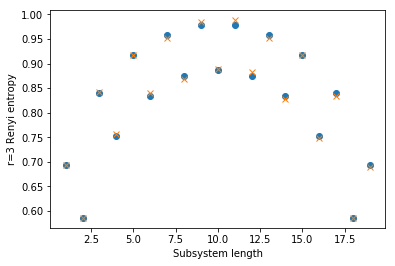

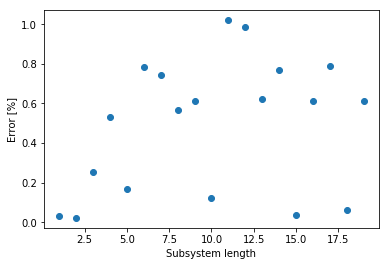

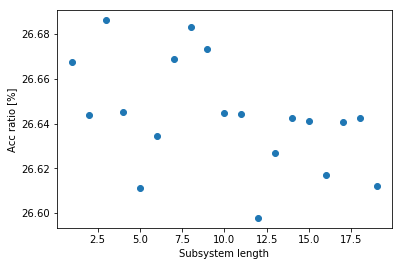

In [18]:
# print('vmc: ', R2_vmc)
# print('exact: ', R2_ex)
print('error [%]:', np.abs(R2_vmc-R2_ex)/R2_ex*100)

plt.figure()
plt.plot(Lsub_list,R2_ex,'o')
plt.plot(Lsub_list,R2_vmc,'x')
plt.xlabel('Subsystem length')
plt.ylabel('r=%d Renyi entropy' % (r))
plt.show()

plt.figure()
plt.plot(Lsub_list,np.abs(R2_vmc-R2_ex)/R2_ex*100,'o')
plt.ylabel('Error [%]')
plt.xlabel('Subsystem length')
plt.show()

plt.figure()
plt.plot(Lsub_list,100*acc_ratio,'o')
plt.ylabel('Acc ratio [%]')
plt.xlabel('Subsystem length')
plt.show()

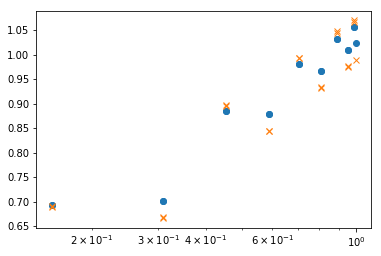

In [9]:
plt.figure()
plt.semilogx(np.sin(pi*Lsub_list/N),R2_ex,'o')
plt.semilogx(np.sin(pi*Lsub_list/N),R2_vmc,'x')
plt.show()

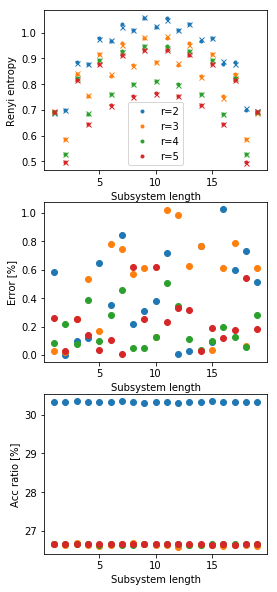

In [44]:

scratch="scratch/"

ex=1
# system size
N=20
Lsub_list=np.arange(1,N)
# Lsub_list=np.arange(4,10,2)
# Lsub_list=[8]
N_pt = int(N/2)

# reference slater determinant
t= -0.
# hopping amplitudes
t1= 1-t
t2= 1+t
BC=np.exp(1j*pi) # boundary condition on a chain, you can put BC=0 for open chain
# BC=1 periodic boundary condition and BC=-1 is anti-periodic
# do not put BC=1 since the gs is not unique in that case
V1=wf_gen(N,N_pt,BC,t1,t2) # eigenvectors in 

R2_ex=np.zeros(len(Lsub_list))
Gmat=np.dot(V1,np.matrix(V1).H)


Nrep=12
r_list=np.arange(2,6) # Renyi index

plt.figure(figsize=(4,10))

for r in r_list:
    R2_vmc=np.zeros(len(Lsub_list), dtype=np.complex64)
    acc_ratio=np.zeros(len(Lsub_list))
    counter=np.zeros(len(Lsub_list))

    for i_L in range(len(Lsub_list)):
        Lsub=Lsub_list[i_L]

        inds_A= np.arange(0,Lsub_list[i_L])
        R2_ex[i_L]=exact_renyi_calc(r,Gmat[np.ix_(inds_A,inds_A)])

        if ex>1:
            f1='R%d_e_%d_N_%d_Npt_%d_t_%.2f_Lsub_%d' % (r,ex,N,N_pt,t,Lsub)
        else:
            f1='R%d_N_%d_Npt_%d_t_%.2f_Lsub_%d' % (r,N,N_pt,t,Lsub)

        for i_r in range(Nrep):
    #     for i_r in [0,1,4,5,6,7]:

            inds_A= np.arange(0,Lsub)

            if r>2 or ex>1:
                fname= scratch + f1 + '_rep_%d.npz' % (i_r)
            else:
                fname= scratch + f1 + '_r_%d.npz' % (i_r)

            if path.exists(fname):
                npzfile = np.load(fname)
                if r>2 or ex>1:
                    R2_vmc[i_L]+= npzfile['Rr_vmc']
                else:
                    R2_vmc[i_L]+= npzfile['R2_vmc']

                acc_ratio[i_L]+= npzfile['acc_ratio']
                counter[i_L]+=1

    R2_vmc= np.real(R2_vmc)/counter
    acc_ratio= acc_ratio/counter

    ax1= plt.subplot(3,1,1)
    ax1.plot(Lsub_list,R2_ex,'o',color='C%d' % (r-2),markersize=3,label='r=%d' % (r))
    ax1.plot(Lsub_list,R2_vmc,'x',color='C%d' % (r-2),markersize=5)
    plt.xlabel('Subsystem length')
    plt.ylabel('Renyi entropy' % (r))
    plt.legend()

    ax2= plt.subplot(3,1,2)
    ax2.plot(Lsub_list,np.abs(R2_vmc-R2_ex)/R2_ex*100,'o',color='C%d' % (r-2))
    plt.ylabel('Error [%]')
    plt.xlabel('Subsystem length')

    ax3= plt.subplot(3,1,3)
    ax3.plot(Lsub_list,100*acc_ratio,'o')
    plt.ylabel('Acc ratio [%]')
    plt.xlabel('Subsystem length')
